Limpieza de datos de la tabla facturas de compra "InvoicePurchases12312016"

In [1]:
# Importo las librerias que voy a usar

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

Carga del dataset

In [2]:
# Leo el dataset de mi disco local correspondiente a la tabla "InvoicePurchases12312016"

df_ruta_data= r'C:\Users\fel-p\Documents\DATA_ANALITYCS_Henry\PF\archive (2)\InvoicePurchases12312016.csv'

df_facturas_compra= pd.read_csv(df_ruta_data)

# Compruebo que se haya cargado correctamente, verificando las 5 primeras filas
print(df_facturas_compra.head())



   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47      NaN  
1  2015-12-22  2016-02-21        15     140.55     8.57      NaN  
2  2015-12-24  2016-02-16         5     106.60     4.61      NaN  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20      NaN  
4  2015-12-24  2016-02-12      1935   15527.25   429.20      NaN  


Limpieza de datos

In [3]:
# Manejo de  valores faltantes

# Cuantas filas quedarían si elimino todas las filas con NaN
print("Filas que quedarían si elimino las filas con NaN:", len(df_facturas_compra.dropna()))

# conteo de NaN por columna
print("Filas con valores NaN en cada columna  \n", df_facturas_compra.isna().sum())

Filas que quedarían si elimino las filas con NaN: 374
Filas con valores NaN en cada columna  
 VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


<Figure size 1000x600 with 0 Axes>

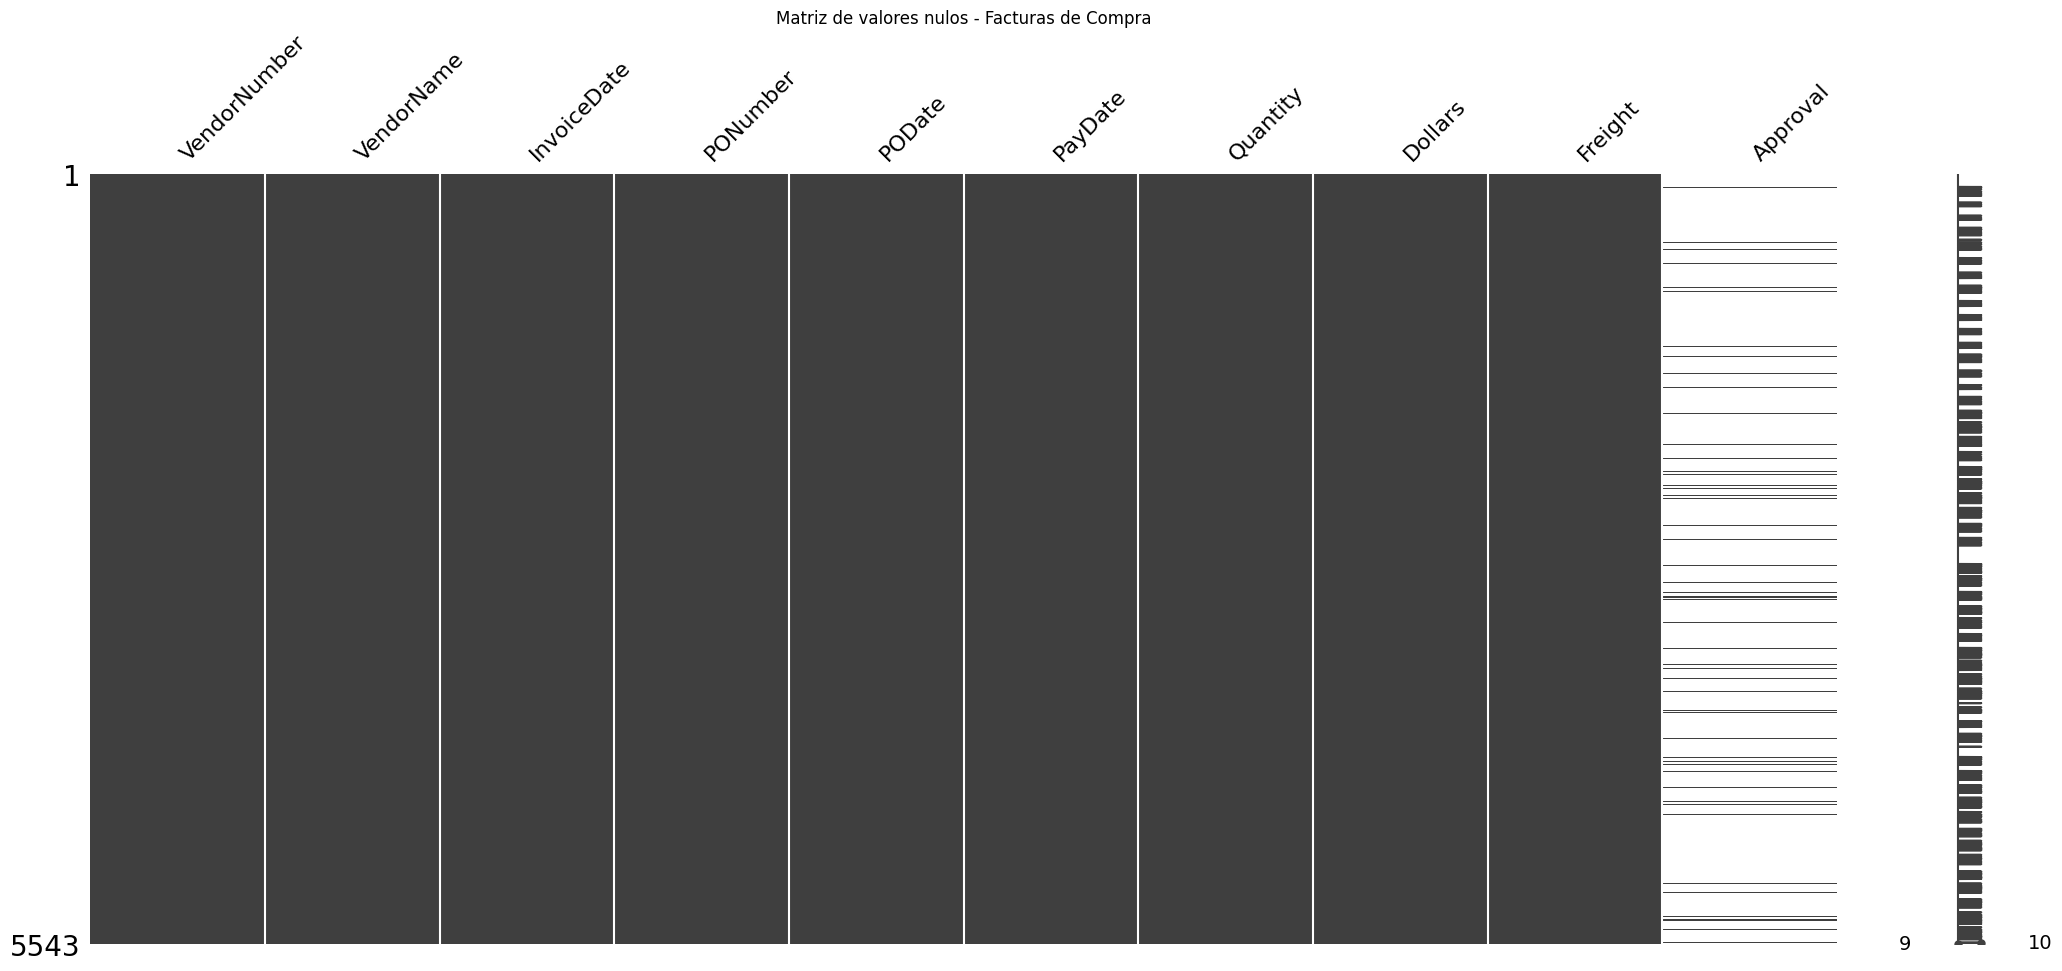

In [4]:
# Hago la matriz de nulos te permite visualizar de forma rápida dónde están los valores faltantes 
plt.figure(figsize=(10,6))
msno.matrix(df_facturas_compra)
plt.title("Matriz de valores nulos - Facturas de Compra")
plt.show()

In [5]:
# Por análisis determinamos que las columnas que aparecen vacias en Approval son facturas sin aprovar
# por lo que completamos los campos con "pending"

df_facturas_compra ["Approval"]= df_facturas_compra["Approval"].fillna("pendign")

# conteo de NaN por columna
print("Filas con valores NaN en cada columna  \n", df_facturas_compra.isna().sum())

Filas con valores NaN en cada columna  
 VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64


Ajuste al tipo de dato

In [6]:
#Validar el tipo de dato, para encontrar incosistencias
print(df_facturas_compra.dtypes)

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object


In [7]:
# Lo primero es el parseo de las columnas de fecha

fechas=["InvoiceDate","PayDate","PODate"]


In [8]:
#Convierto a datetime para poder cambiar el formato a dd-mm-yyyy

for col in fechas:
    df_facturas_compra[col] = pd.to_datetime(df_facturas_compra[col], errors='coerce')

#df_facturas_compra [fechas]= pd.to_datetime(df_facturas_compra[fechas])

print(df_facturas_compra[fechas].dtypes)

InvoiceDate    datetime64[ns]
PayDate        datetime64[ns]
PODate         datetime64[ns]
dtype: object


In [9]:
# Paso los tipo Object a String
df_facturas_compra = df_facturas_compra.astype({col: "string" for col in df_facturas_compra.select_dtypes(include="object").columns
})

print(df_facturas_compra.dtypes)

VendorNumber             int64
VendorName      string[python]
InvoiceDate     datetime64[ns]
PONumber                 int64
PODate          datetime64[ns]
PayDate         datetime64[ns]
Quantity                 int64
Dollars                float64
Freight                float64
Approval        string[python]
dtype: object


Como quedamos pasamos de camel case a snake_case importando la libreria inflection

In [10]:
import inflection

# Paso de camel case a snake_case

df_facturas_compra.columns = [
    inflection.underscore(col) for col in df_facturas_compra.columns]

print(df_facturas_compra.columns)

Index(['vendor_number', 'vendor_name', 'invoice_date', 'po_number', 'po_date',
       'pay_date', 'quantity', 'dollars', 'freight', 'approval'],
      dtype='object')


Manejo de outliers

Si bien, no hay valores negativos en las columnas numericas Pero en el proceso EDA se observaron valores elevados en estas columnas, son justificables puesto que pueden haber facturas de compra con valores muy elevados que corresponen a grandes ventas por lo que no se modificarán los datos de esta tabla y esos valores altos no se considerarán outliers. 

Guardo el dataset limpio y ajustado con el nombre que voy a utilizar la columna en el resto del análisis. pasa de ser "InvoicePurchases12312016.csv” a "Facturas_de_compra "

In [11]:
# Guardo el DF para cerrar el proceso de limpieza de datos

df_facturas_compra.to_csv('Facturas_de_compra.csv', index=False)